## Startup

In [1]:
import os
import data_import
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math

max_iterations=100000


In [2]:
cache = {}

def exec(N, h, t, s):
    dir = "output/{}_{}_{}_{}".format(n,h,t,s)
    os.makedirs(dir, exist_ok=True)
    os.chdir(dir)
    key = (N,h,t,s)
    c =cache.get(key)
    if not c:    
        command = f"java -cp ../../target/gasDiffusion-1.0-SNAPSHOT.jar -DnumParticles={N} -DholeSize={h} -Dseed={s} -Dthreshold={t} -DmaxIterations={max_iterations} gasDiffusion.Main"
        proc = os.popen(command)
        time = proc.readlines()[-1]
    else:
        time = c
    data = data_import.Data("2DGasDiffusion.txt")
    cache[key] = time
    os.chdir("../../")
    return (time,data)
    

## 1.2

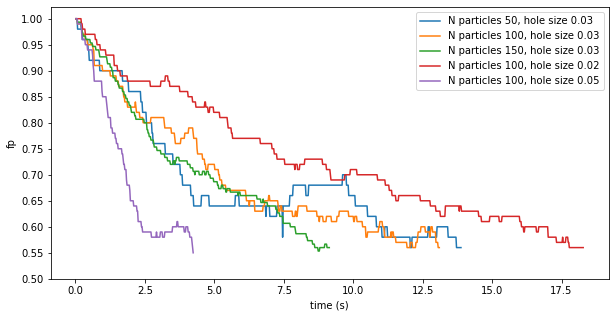

In [3]:
C = [
    (50,0.03)
    ,(100, 0.03)
    ,(150, 0.03)
    ,(100, 0.02)
    ,(100, 0.05)
    ]

plt.figure("fp vs time", figsize=(10,5))
plt.xlabel("time (s)")
plt.ylabel("fp")



for c in C:
    n,h = c
    count = []
    times = []
    time, data = exec(n,h, 0.05, 2022)
    
    for time, a,b, _data in data:
        count.append(a)
        times.append(time)

    plt.plot(times,count, label=f"N particles {n}, hole size {h}")
    
plt.legend()
plt.yticks(np.arange(0.5,1.05,0.05))
plt.show()
    


## 1.2.2.a

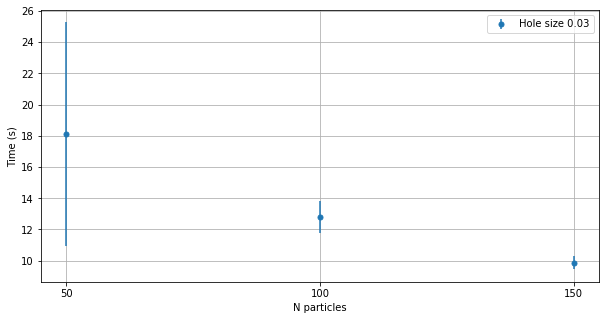

In [4]:
seeds = [2022, 2023, 2024]
N = [50,100,150]
h = 0.03

avg = []
errors = []

plt.figure("Time vs N particles",figsize=(10,5))
plt.xlabel("N particles")
plt.ylabel("Time (s)")

for n in N:
    times = []
    for s in seeds:
        time, data = exec(n,h, 0.05, s)
        times.append(time)
    avg.append(statistics.mean(map(float,times)))
    errors.append(statistics.stdev(map(float,times))/math.sqrt(len(times)))
    
plt.errorbar(N, avg, yerr=errors, fmt="o", label=f"Hole size {h}", markersize=5)
plt.legend()
plt.xticks(N)
plt.grid()
plt.show()



## 1.2.2.b

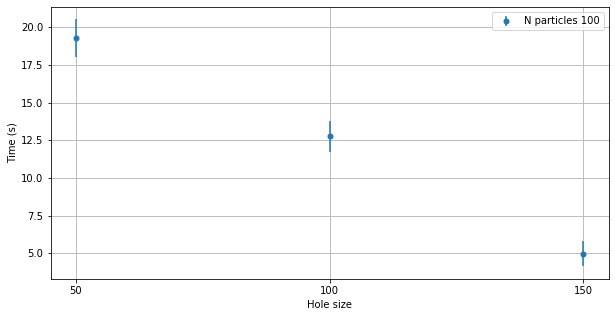

In [5]:
seeds = [2022, 2023, 2024]
H = [0.02,0.03,0.05]
n = 100

avg = []
errors = []

plt.figure("Time vs Hole size",figsize=(10,5))
plt.xlabel("Hole size")
plt.ylabel("Time (s)")

for h in H:
    times = []
    for s in seeds:
        time, data = exec(n,h, 0.05, s)
        times.append(time)
    avg.append(statistics.mean(map(float,times)))
    errors.append(statistics.stdev(map(float,times))/math.sqrt(len(times)))
    
plt.errorbar(N, avg, yerr=errors, fmt="o", label=f"N particles {n}", markersize=5)
plt.legend()
plt.xticks(N)
plt.grid()
plt.show()
